In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [4]:
# Show the first training example

print(f"Training Sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_labels[0]}\n")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

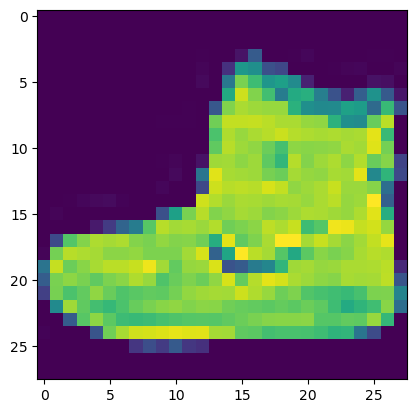

In [7]:
plt.imshow(train_data[0])
plt.show()

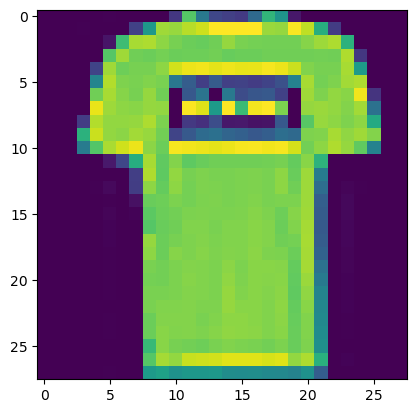

In [8]:
plt.imshow(train_data[1])
plt.show()

In [9]:
train_labels[1]

0

In [11]:
# Create a small list so we can index onto our training labels
# Making them human-readable
class_names = ['t-shirt', 'trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

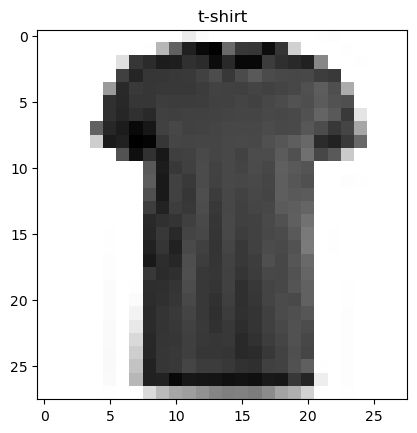

In [12]:
# Plot an example and its label
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])
plt.show()

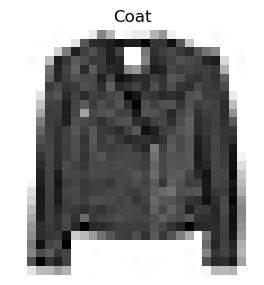

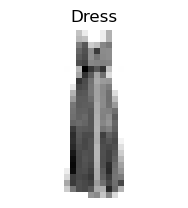

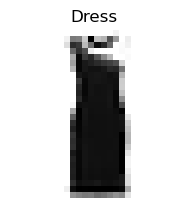

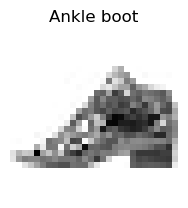

In [15]:
# Plot multiple random images of Fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax=plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)
    plt.show()

# Building a multi-class classification model


In [24]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [32]:
tf.random.set_seed(42)

#Flatten layer changes shape (28, 28) to (none, 784)
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#SparseCategoricalEntropy supports int; CategoricalEntropy does not
model_1.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

model_1_history = model_1.fit(train_data,
                         train_labels,
                         epochs=10,
                         validation_data=(test_data, test_labels))



Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1661 - accuracy: 0.1615 - val_loss: 1.7978 - val_accuracy: 0.2088
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7075 - accuracy: 0.2492 - val_loss: 1.6502 - val_accuracy: 0.2987
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6340 - accuracy: 0.2792 - val_loss: 1.6236 - val_accuracy: 0.2835
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6100 - accuracy: 0.2815 - val_loss: 1.6047 - val_accuracy: 0.2907
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5996 - accuracy: 0.2989 - val_loss: 1.5833 - val_accuracy: 0.3148
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5901 - accuracy: 0.3093 - val_loss: 1.5709 - val_accuracy: 0.3099
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5828 - accuracy: 0.3163 - val_loss: 1.5717 - val_accuracy:

### Note that adding the validation data to the fitting step, made the metrics for the validation data show up in the verbose output

# First step in improving the model will be to check the data loaded in.

* Check the min and max values of the training data

In [28]:
train_data.min(), train_data.max()

(0, 255)

* Neural networks prefer data to be scaled (or normalized), meaning that they like to have numbers in the tensor between 0 and 1, but right now the tensor has a range of (0, 255)

* So let's get the training/test data between 0 and 1 by dividing by the max value

In [30]:
train_data_norm = train_data/train_data.max()
test_data_norm = test_data/test_data.max()
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

* Now that our data is normalized and in the proper dtype(float) we can fit the model again

In [33]:
tf.random.set_seed(42)

#Flatten layer changes shape (28, 28) to (none, 784)
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#SparseCategoricalEntropy supports int; CategoricalEntropy does not
model_2.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

model_2_history = model.fit(train_data_norm,
                         train_labels,
                         epochs=10,
                         validation_data=(test_data_norm, test_labels))



Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5315 - accuracy: 0.8121 - val_loss: 0.5729 - val_accuracy: 0.8010
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5292 - accuracy: 0.8139 - val_loss: 0.5907 - val_accuracy: 0.7943
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5256 - accuracy: 0.8143 - val_loss: 0.5787 - val_accuracy: 0.7951
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5238 - accuracy: 0.8156 - val_loss: 0.5804 - val_accuracy: 0.7974
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5229 - accuracy: 0.8148 - val_loss: 0.5810 - val_accuracy: 0.8005
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5203 - accuracy: 0.8163 - val_loss: 0.5667 - val_accuracy: 0.8022
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5201 - accuracy: 0.8158 - val_loss: 0.5923 - val_accuracy:

* We used the exact same model and yet our model performed at 80% accuracy vs. 30~% accuracy

**This is the power of normalized data**

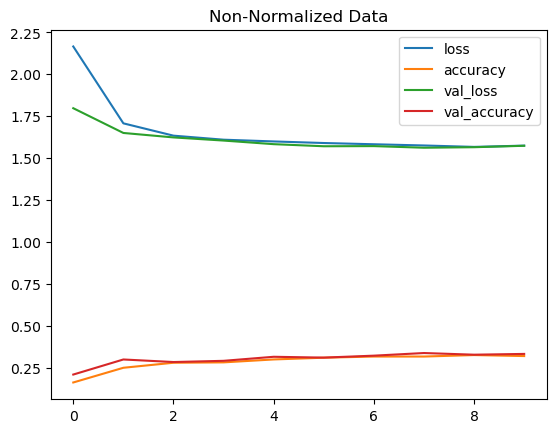

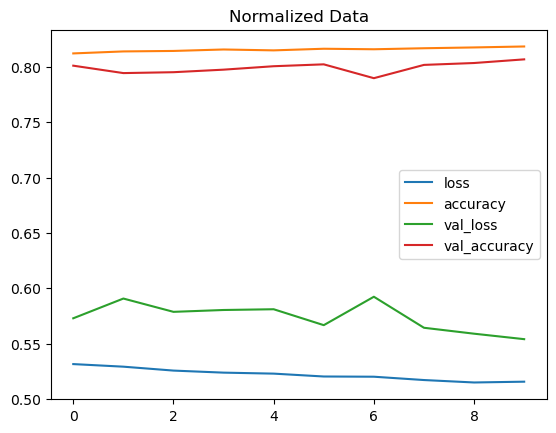

In [34]:
# Plotting non-normalized data loss curves

pd.DataFrame(model_1_history.history).plot(title="Non-Normalized Data")
pd.DataFrame(model_2_history.history).plot(title='Normalized Data')
plt.show()

### Ensure that when comparing models, we're comparing them on the same criteria (i.e. same architecture and different data or different architecture and same data)
* Change as few hyperparameters as possible and compare the results so that you can pinpoint the thing that's helping.

In [38]:
# Let's find the ideal lr to help our model

tf.random.set_seed(42)

model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
               optimizer=keras.optimizers.Adam(),
               metrics=['accuracy'])

lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model_3_history = model_3.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                             validation_data=(test_data_norm, test_labels),
                             callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

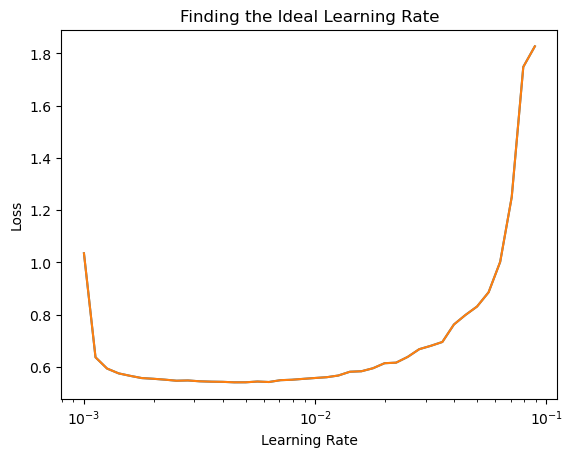

In [45]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, model_3_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel("Loss")
plt.title('Finding the Ideal Learning Rate')
plt.show()

In [48]:
# Refitting a model with the ideal learning rate

tf.random.set_seed(42)

model_4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_4.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
               optimizer=keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

history_4 = model_4.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

### Evaluating the multi-class classification model
1. Evaluate its performance using confusion matrix
2. Assess the predictions using visualizations
3. Improve the results (by training for longer, or changing architecture)

In [49]:
from sklearn.metrics import confusion_matrix

In [65]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=20):
    """
    Makes a confusion matrix to show the true/false positives/negatives
    """
    cm = confusion_matrix(y_true, tf.math.round(y_pred))
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalizes our confusion matrix
    n_classes = cm.shape[0]

    #Prettifying it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # Shows a matrix in a figure window
    fig.colorbar(cax)
    
    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels=np.arange(cm.shape[0])

    # Label the axes
    ax.set(title='Confusion Matrix',
          xlabel="Predicted Label",
          ylabel= "True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes), 
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to bootom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) /2.

    # Plot the text on each cell

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{(cm[i, j])} ({cm_norm[i, j]*100:.1f}%)", 
                 horizontalalignment='center',
                color='white' if cm[i, j] > threshold else 'black',
                size=text_size)
    plt.show()

In [68]:
# Make some predictions using our model
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=20):
    """
    Makes a confusion matrix to show the true/false positives/negatives
    """
    cm = confusion_matrix(y_true, tf.math.round(y_pred))
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalizes our confusion matrix
    n_classes = cm.shape[0]

    #Prettifying it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # Shows a matrix in a figure window
    fig.colorbar(cax)
    
    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels=np.arange(cm.shape[0])

    # Label the axes
    ax.set(title='Confusion Matrix',
          xlabel="Predicted Label",
          ylabel= "True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes), 
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to bootom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) /2.

    # Plot the text on each cell

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{(cm[i, j])} ({cm_norm[i, j]*100:.1f}%)", 
                 horizontalalignment='center',
                color='white' if cm[i, j] > threshold else 'black',
                size=text_size)
    plt.show()
y_pred = model_4.predict(test_data_norm)
y_pred = tf.argmax(y_pred, axis=1)

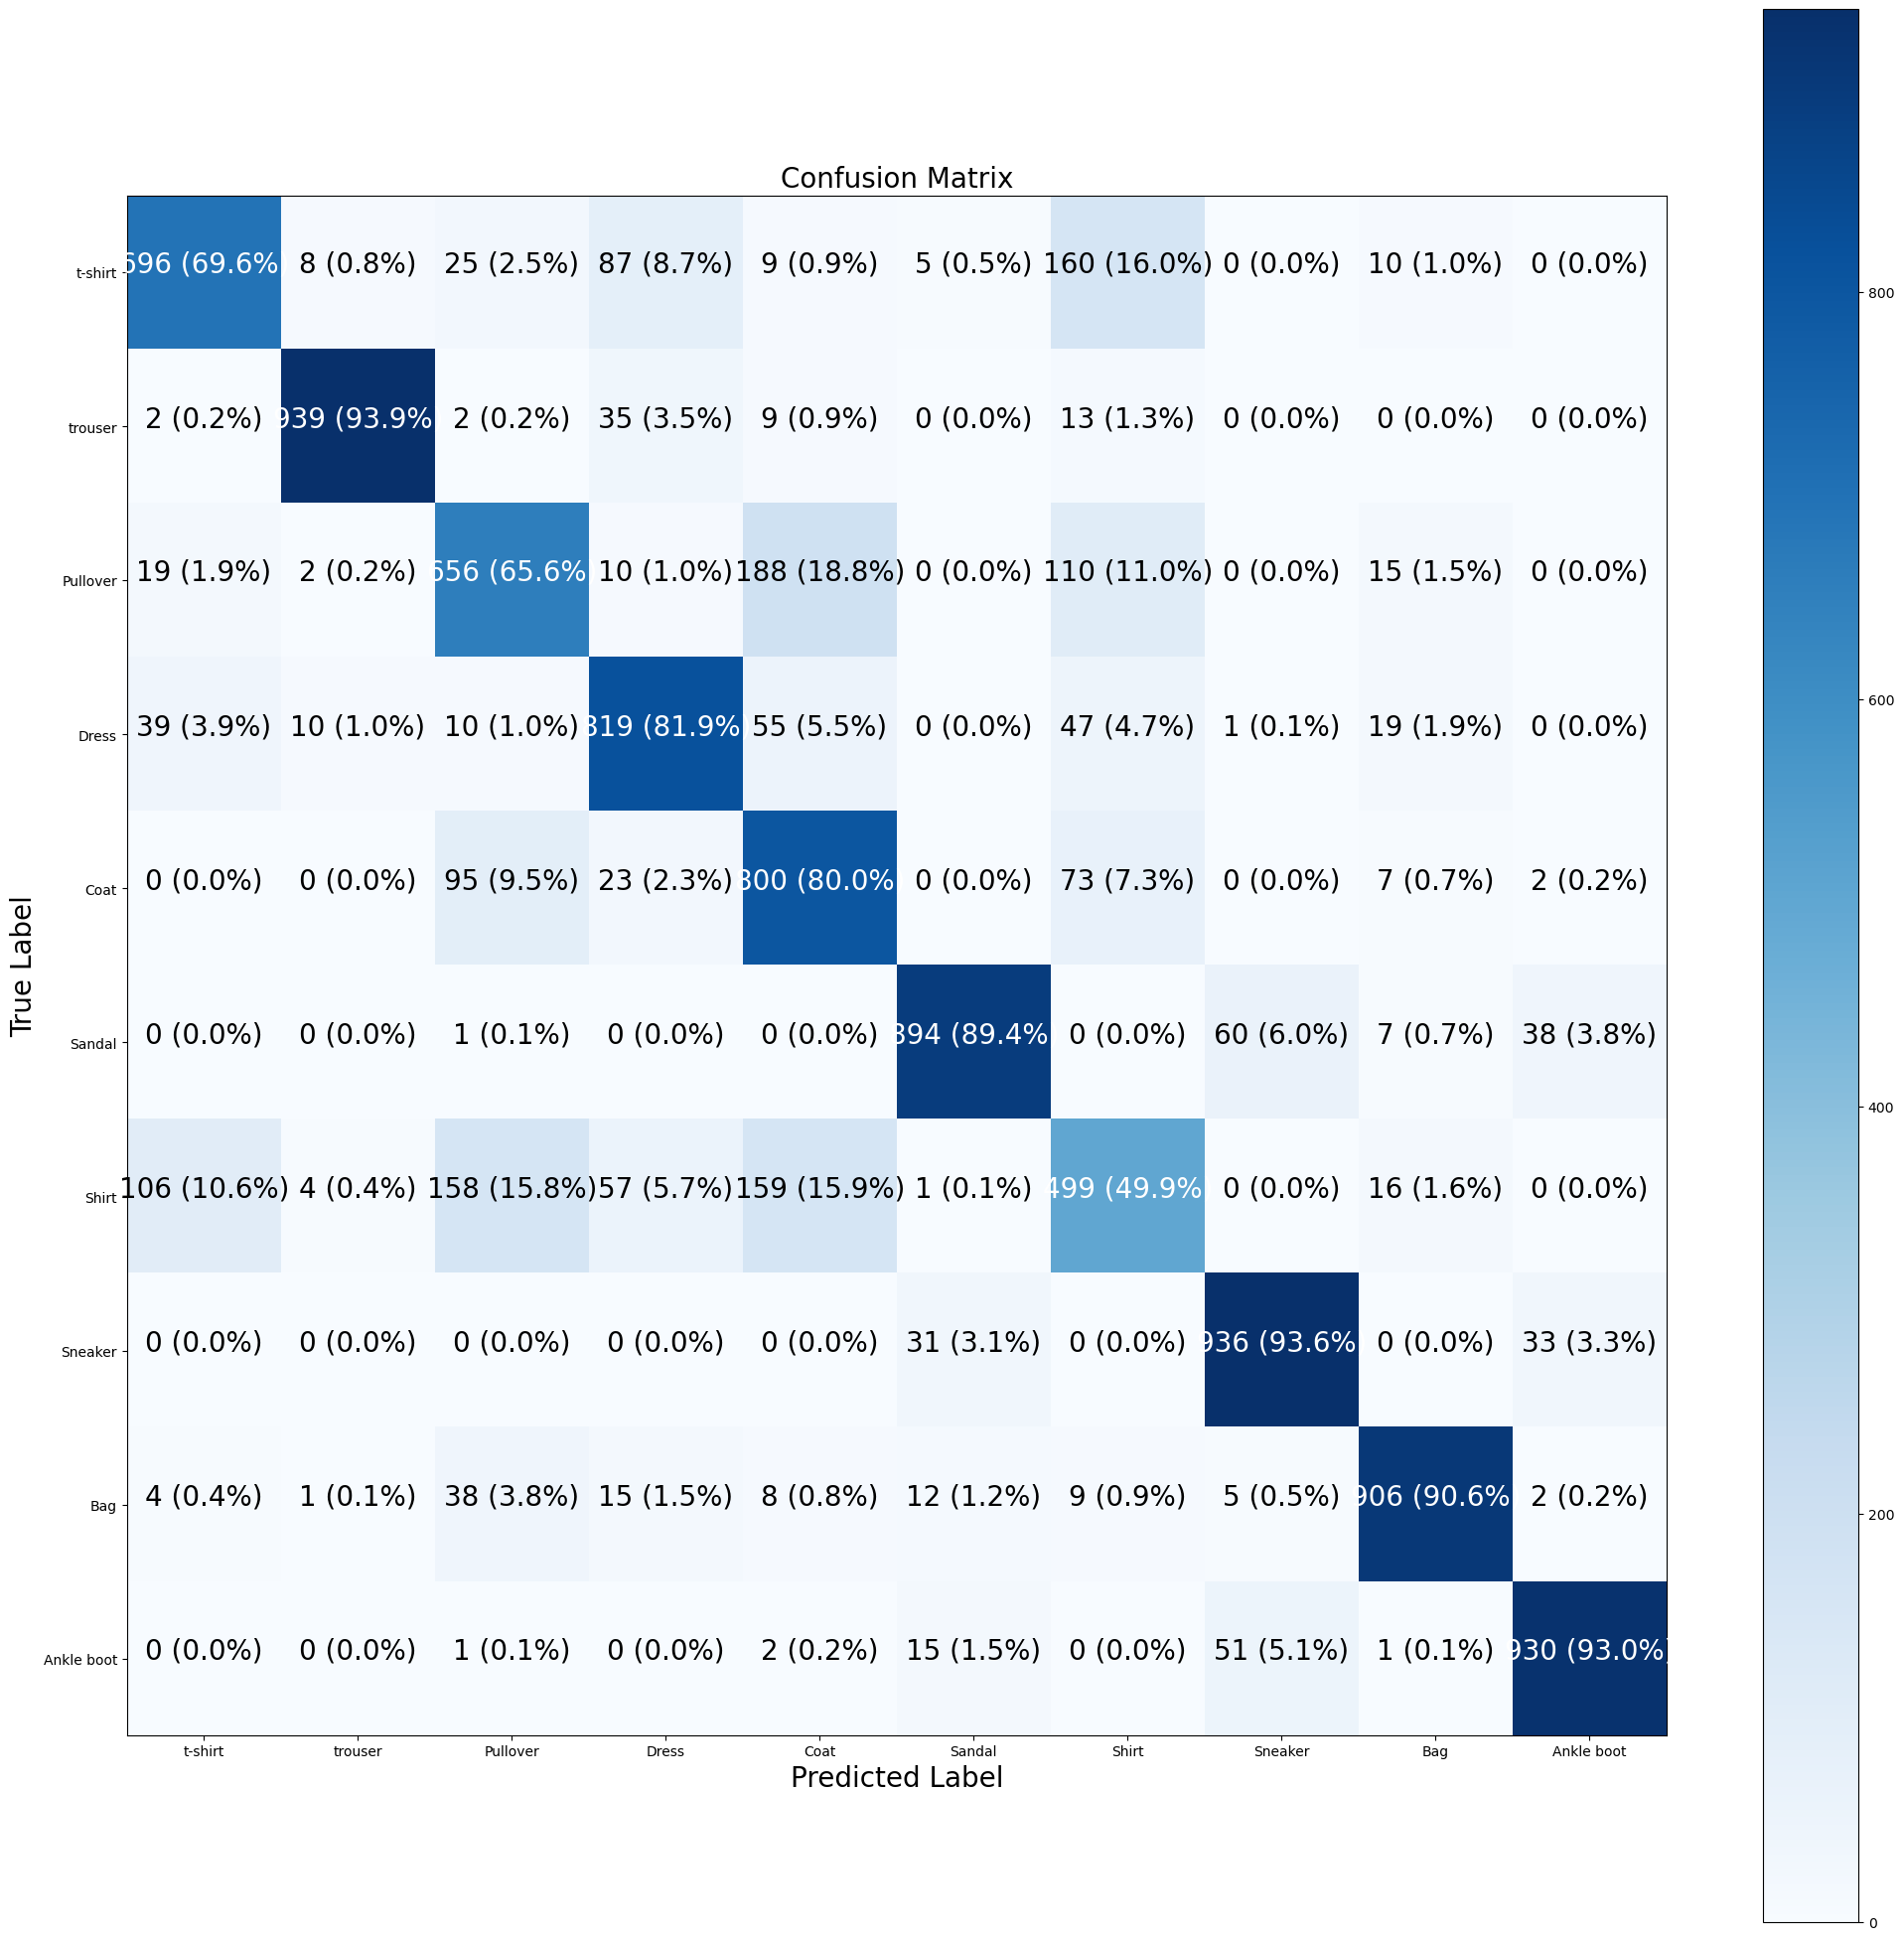

In [76]:
import itertools
make_confusion_matrix(test_labels, y_pred, classes=class_names,figsize=(25,25))

In [84]:
# Let's visualize the predictions another way
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with 
    a prediction and truth label
    """
    i = random.randint(0,len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    #Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    #Change the color of the titles depending on if the prediction is true
    if pred_label == true_label:
        color='green'
    else:
        color='red'
    
    #Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {}".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # Set the color to green or red depending on truth of prediction
    plt.show()
    

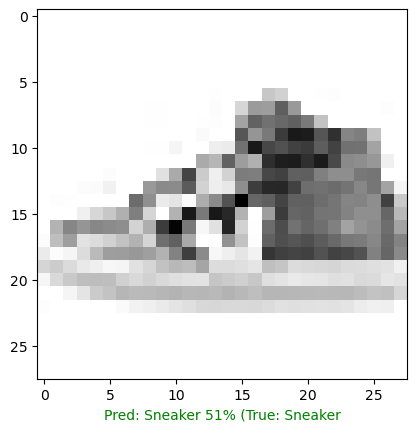

In [107]:
# Check out a random image as well as its prediction

plot_random_image(model=model_4, 
                  images=test_data_norm,
                 true_labels=test_labels,
                 classes=class_names)

## What patterns are our model learning?

In [108]:
# Find the layers of our model
model_4.layers

In [109]:
# Extract a particular layer
model_4.layers[2]

In [111]:
# Get the patterns of a layer in our network
weights, biases = model_4.layers[2].get_weights()

#Shapes
weights, weights.shape

(array([[ 1.0736768 , -0.19358249,  0.5072536 , -0.3560668 ],
        [ 0.34898186,  1.1341447 ,  0.84305114,  0.5526565 ],
        [ 0.09337538,  0.46247533, -0.6996273 ,  0.58674836],
        [-0.3245145 , -0.21780165,  0.5666555 ,  1.275238  ]],
       dtype=float32),
 (4, 4))

In [112]:
model_4.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_42 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [113]:
# Now let's check out the bias vector

# Bias and Bias shapes from the layer selected

biases, biases.shape

(array([-0.65087783, -0.2838544 ,  0.28233397, -0.37909892], dtype=float32),
 (4,))

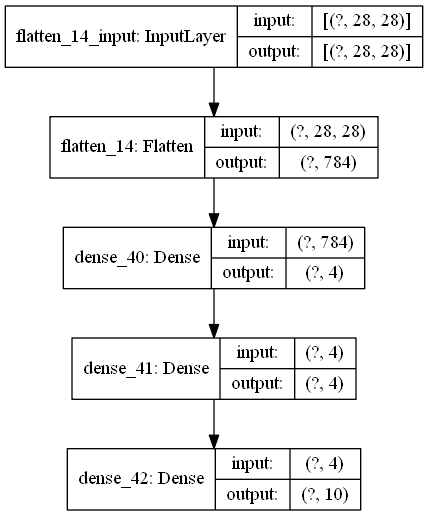

In [115]:
# Anothe way to visualize our deep learning model
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_4, show_shapes=True)